In [1]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

In [3]:
frequencies = [440.00, 293.665, 349.228]
duration = 0.5  # seconds
sample_rate = 44100  # samples per second

In [9]:
t = np.linspace(0, duration, int(sample_rate * duration), False)
audio = [np.sin(2 * np.pi * freq * t) for freq in frequencies]
audio = np.sum(audio, axis=0)

In [10]:
sd.play(audio, sample_rate)
sd.wait()

In [11]:
nyquist_frequency = sample_rate / 2
test_frequencies = np.linspace(0, 600, 1000)

In [12]:
def ft(t, audio, freq):
    dt = t[1] - t[0]
    return np.sum([a*np.e**(-2j*np.pi*freq*_t) for _t, a in zip(t, audio)]) * dt

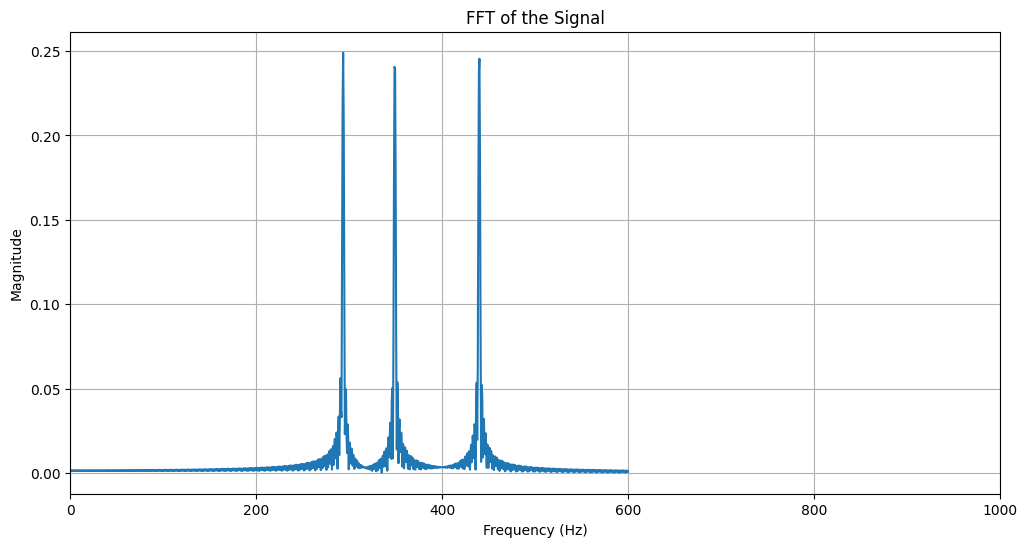

In [13]:
ft_result = [ft(t, audio, freq) for freq in test_frequencies]
plt.figure(figsize=(12, 6))
plt.plot(test_frequencies, np.abs(ft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of the Signal')
plt.xlim(0, 1000)
plt.grid(True)
plt.show()


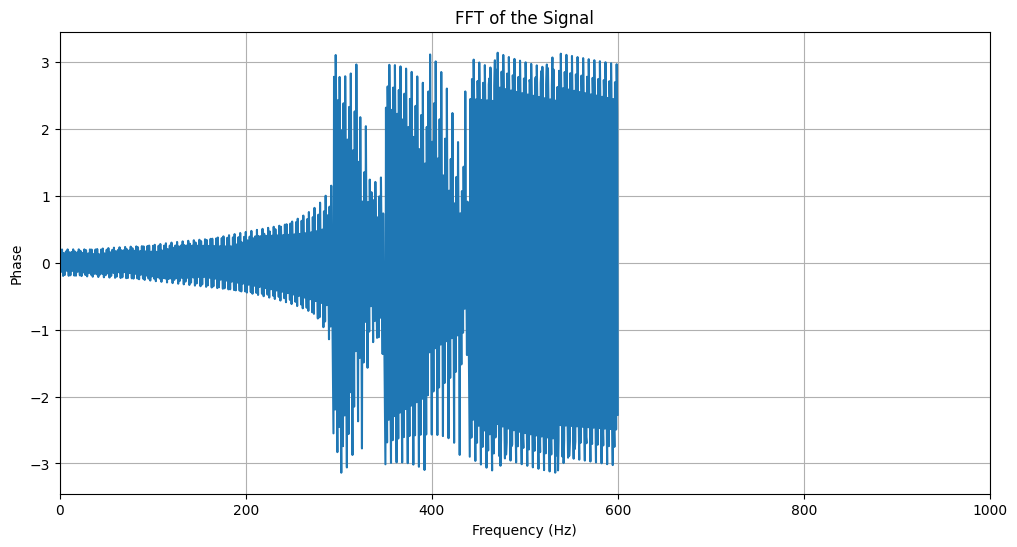

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(test_frequencies, np.angle(ft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.title('FFT of the Signal')
plt.xlim(0, 1000)
plt.grid(True)
plt.show()